In [ ]:
# Importing required Python Packages and Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import datetime as dt
from datetime import timedelta
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math 
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Data exploration
# load the data
Covid19=pd.read_csv("/content/covid_19_data.csv")
#Covid19=pd.read_csv("/content/time_series_covid_19_confirmed.csv")
#Covid19=pd.read_csv("/content/time_series_covid_19_deaths.csv")
#Covid19=pd.read_csv("/content/time_series_covid_19_recovered.csv")


In [ ]:
# Two things to note here:

#The data contains a province, country, latitude, and longitude. We won't be needing those.
#The number of cases is cumulative. We'll undo the accumulation.
#Let's start by getting rid of the first four columns:

Covid19.head()

#Covid19


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
print("size/shape of the dataset",Covid19.shape)
print("checking for null values",Covid19.isnull().sum())
print("checking Data_Type",Covid19.dtypes)

size/shape of the dataset (30330, 8)
checking for null values SNo                    0
ObservationDate        0
Province/State     15255
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
checking Data_Type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [ ]:
Covid19["Country/Region"].nunique()

223

In [ ]:
# Dropping column as SNo is of no use contains too many missing values
Covid19.drop(['SNo'],1,inplace=True)

In [ ]:
# Let's check for missing values:
Covid19.isnull().sum()

ObservationDate        0
Province/State     15255
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [ ]:
#Converting "Observation Date" into Datetime format
Covid19["ObservationDate"]=pd.to_datetime(Covid19["ObservationDate"])

In [ ]:
Covid19["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
30325   2020-05-27
30326   2020-05-27
30327   2020-05-27
30328   2020-05-27
30329   2020-05-27
Name: ObservationDate, Length: 30330, dtype: datetime64[ns]

In [ ]:
# Grouping different types of cases as per the date
grouped_multiple=Covid19.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [ ]:
print("Basic information")
print("Total number of Confirmed Cases a round the world",grouped_multiple["Confirmed"].iloc[-1])
print("Total number of Recovered Cases a round the world",grouped_multiple["Recovered"].iloc[-1])
print("Total number of Deaths Cases a round the world",grouped_multiple["Deaths"].iloc[-1])

print("Total number of Active Cases a round the world",(grouped_multiple["Confirmed"].iloc[-1]-grouped_multiple["Recovered"].iloc[-1]-grouped_multiple["Deaths"].iloc[-1]))
print("Total number of Closed Cases a round the world",(grouped_multiple["Recovered"].iloc[-1]+grouped_multiple["Deaths"].iloc[-1]))


Basic information
Total number of Confirmed Cases a round the world 5691790.0
Total number of Recovered Cases a round the world 2350088.0
Total number of Deaths Cases a round the world 355629.0
Total number of Active Cases a round the world 2986073.0
Total number of Closed Cases a round the world 2705717.0


In [ ]:
# Number of Confirmed Cases
#plt.figure(figsize=(15,8))
#sns.barplot(x=grouped_multiple.index.date,y=grouped_multiple["Confirmed"])
#plt.title("Distribution plot for Confirmed Case")
#plt.xticks(rotation=90)

fig=px.bar(x=grouped_multiple.index.date,y=grouped_multiple["Confirmed"])
fig.update_layout(title="Distribution plot for Confirmed Case",
xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()
plt.savefig('01br.png')


<Figure size 432x288 with 0 Axes>

In [ ]:
# Number of Recovered Cases
#plt.figure(figsize=(15,8))
#sns.barplot(x=grouped_multiple.index.date,y=grouped_multiple["Recovered"])
#plt.title("Distribution plot for Confirmed Case")
#plt.xticks(rotation=90)

fig=px.bar(x=grouped_multiple.index.date,y=grouped_multiple["Recovered"])
fig.update_layout(title="Distribution plot for Recovered Case",
xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()
plt.savefig('01br.png')


<Figure size 432x288 with 0 Axes>

In [ ]:
# Number of Deaths Cases
#plt.figure(figsize=(15,8))
#sns.barplot(x=grouped_multiple.index.date,y=grouped_multiple["Deaths"])
#plt.title("Distribution plot for Confirmed Case")
#plt.xticks(rotation=90)

fig=px.bar(x=grouped_multiple.index.date,y=grouped_multiple["Deaths"])
fig.update_layout(title="Distribution plot for Deaths Case",
xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()
plt.savefig('01br.png')


<Figure size 432x288 with 0 Axes>

In [ ]:
# Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases.
# Increase in number of Active Cases is probably an indication of Recovered case or Death case number 
# is dropping in comparison to number of Confirmed Cases drastically.

#plt.figure(figsize=(15,8))
#sns.barplot(x=grouped_multiple.index.date,y=grouped_multiple["Confirmed"]-grouped_multiple["Recovered"]-grouped_multiple["Deaths"])
#plt.title("Distribution plot for Active Case")
#plt.xticks(rotation=90)

fig=px.bar(x=grouped_multiple.index.date,y=grouped_multiple["Confirmed"]-grouped_multiple["Recovered"]-grouped_multiple["Deaths"])
fig.update_layout(title="Distribution plot for Active Case",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()



In [ ]:
# Closed Cases = Number of Recovered Cases + Number of Death Cases.
# Increase in number of Closed classes imply either more patients are
# getting recovered from the disease or more people are dying because of COVID-19

fig=px.bar(x=grouped_multiple.index.date,y=grouped_multiple["Recovered"]+grouped_multiple["Deaths"])
fig.update_layout(title="Distribution plot for Closed Case",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()



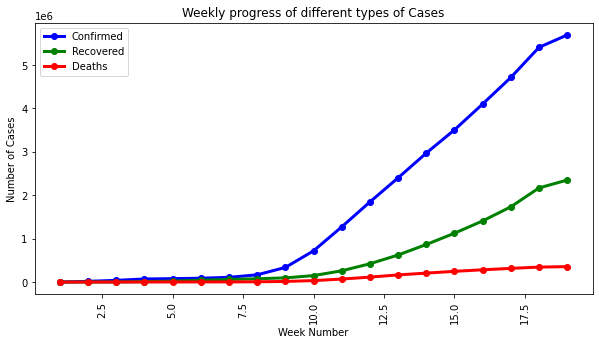

In [ ]:

grouped_multiple["WeekofYear"]=grouped_multiple.index.weekofyear
week_num=[]
week_Confirmed=[]
week_Recovered=[]
week_Deaths=[]
w=1

for i in list(grouped_multiple["WeekofYear"].unique()):
  week_Confirmed.append(grouped_multiple[grouped_multiple["WeekofYear"]==i]["Confirmed"].iloc[-1])
  week_Recovered.append(grouped_multiple[grouped_multiple["WeekofYear"]==i]["Recovered"].iloc[-1])
  week_Deaths.append(grouped_multiple[grouped_multiple["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num.append(w)
  w=w+1

plt.figure(figsize=(10,5))
#plt.plot(week_num,week_Confirmed, marker="o", color='Blue', linewidth=3, label="Confirmed")
plt.plot(week_num,week_Confirmed,label='Confirmed',marker="o", color='Blue', linewidth=3)
plt.plot(week_num,week_Recovered,label='Recovered',marker="o", color='green', linewidth=3)
plt.plot(week_num,week_Deaths,label='Deaths',marker="o",color='Red', linewidth=3)
plt.xlabel("Week Number")
plt.ylabel("Number of Cases")
plt.title("Weekly progress of different types of Cases")
plt.legend()
plt.xticks(rotation=90)

plt.savefig('02br.png')





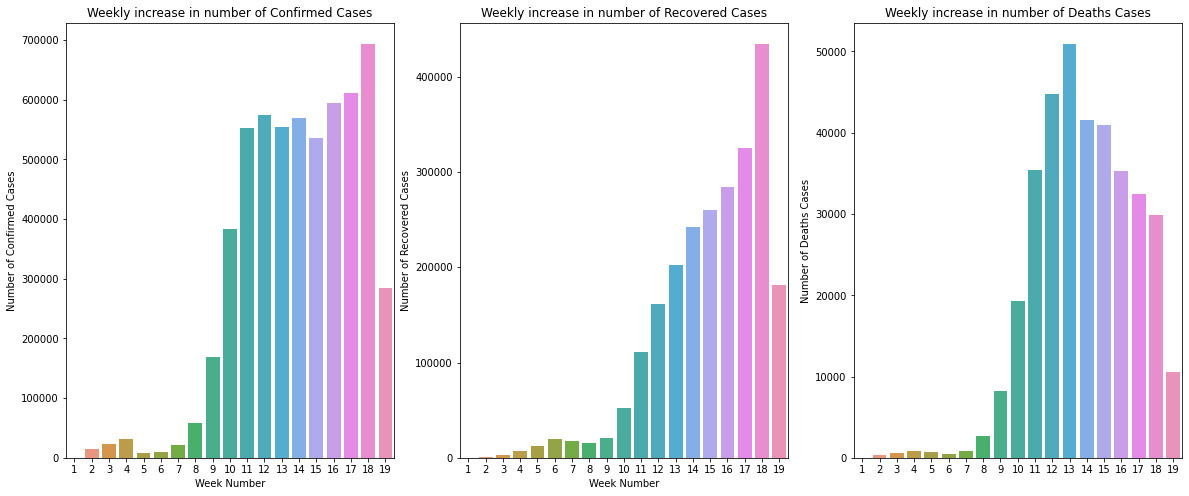

In [ ]:
 fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,8))
 sns.barplot(x=week_num,y=pd.Series(week_Confirmed).diff().fillna(0),ax=ax1)
 sns.barplot(x=week_num,y=pd.Series(week_Recovered).diff().fillna(0),ax=ax2)
 sns.barplot(x=week_num,y=pd.Series(week_Deaths).diff().fillna(0),ax=ax3)
 ax1.set_xlabel("Week Number")
 ax2.set_xlabel("Week Number")
 ax1.set_ylabel("Number of Confirmed Cases")
 ax2.set_ylabel("Number of Recovered Cases")
 ax3.set_ylabel("Number of Deaths Cases")
 ax1.set_title("Weekly increase in number of Confirmed Cases")
 ax2.set_title("Weekly increase in number of Recovered Cases")
 ax3.set_title("Weekly increase in number of Deaths Cases")
 plt.show()


Average increase in number of confirmed cases everyday: 44813.0
Average increase in number of Recovered cases everyday: 18504.0
Average increase in number of Deaths cases everyday: 2800.0


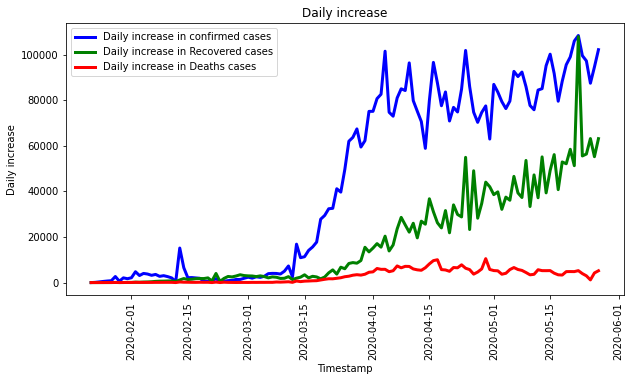

In [ ]:
# Growth rate of Confirmed, Recovered and Death Cases
print("Average increase in number of confirmed cases everyday:",np.round(grouped_multiple["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(grouped_multiple["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday:",np.round(grouped_multiple["Deaths"].diff().fillna(0).mean()))
plt.figure(figsize=(10,5))
plt.plot(grouped_multiple["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",color='blue',linewidth=3)
plt.plot(grouped_multiple["Recovered"].diff().fillna(0),label="Daily increase in Recovered cases",color='green',linewidth=3)
plt.plot(grouped_multiple["Deaths"].diff().fillna(0),label="Daily increase in Deaths cases",color='red',linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()


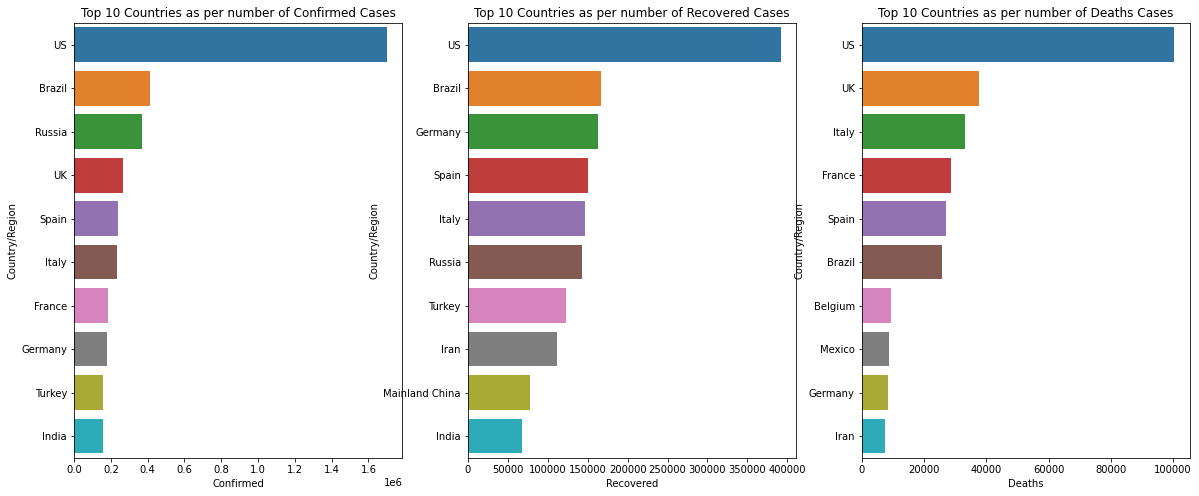

In [ ]:
 # Top 10 Countries as per number of Confirmed,Recovered and Deaths Cases
 Country=Covid19[Covid19["ObservationDate"]==Covid19["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
 fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(20,8))
 top_10_Confirmed=Country.sort_values(["Confirmed"],ascending=False).head(10)
 top_10_Recovered=Country.sort_values(["Recovered"],ascending=False).head(10)
 top_10_Deaths=Country.sort_values(["Deaths"],ascending=False).head(10)

 sns.barplot(x=top_10_Confirmed["Confirmed"],y=top_10_Confirmed.index,ax=ax1)
 ax1.set_title("Top 10 Countries as per number of Confirmed Cases")
 sns.barplot(x=top_10_Recovered["Recovered"],y=top_10_Recovered.index,ax=ax2)
 ax2.set_title("Top 10 Countries as per number of Recovered Cases")
 sns.barplot(x=top_10_Deaths["Deaths"],y=top_10_Deaths.index,ax=ax3)
 ax3.set_title("Top 10 Countries as per number of Deaths Cases")
 
plt.savefig('03br.png')


In [ ]:
# Data Analysis for China
China_data=Covid19[Covid19["Country/Region"]=="Mainland China"]
grouped_multiple_China=China_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print (grouped_multiple_China.iloc[-1])
print("Total Active Cases",grouped_multiple_China["Confirmed"].iloc[-1]-grouped_multiple_China["Recovered"].iloc[-1]-grouped_multiple_China["Deaths"].iloc[-1])
print("Total Closed Cases",grouped_multiple_China["Recovered"].iloc[-1]+grouped_multiple_China["Deaths"].iloc[-1])



Confirmed    82995.0
Recovered    78288.0
Deaths        4634.0
Name: 2020-05-27 00:00:00, dtype: float64
Total Active Cases 73.0
Total Closed Cases 82922.0


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text major ticklabel objects>)

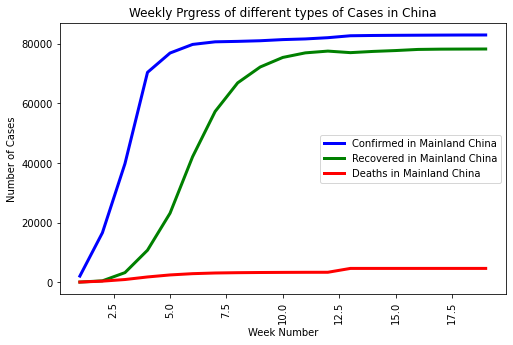

In [ ]:
grouped_multiple_China["WeekofYear"]=grouped_multiple_China.index.weekofyear
week_num_China=[]
China_week_Confirmed=[]
China_week_Recovered=[]
China_week_Deaths=[]
w=1
for i in list(grouped_multiple_China["WeekofYear"].unique()):
  China_week_Confirmed.append(grouped_multiple_China[grouped_multiple_China["WeekofYear"]==i]["Confirmed"].iloc[-1])
  China_week_Recovered.append(grouped_multiple_China[grouped_multiple_China["WeekofYear"]==i]["Recovered"].iloc[-1])
  China_week_Deaths.append(grouped_multiple_China[grouped_multiple_China["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num_China.append(w)
  w=w+1

plt.figure(figsize=(8,5))
#plt.plot(week_num_China,China_week_Confirmed,marker="o",color='blue',linewidth=3)

plt.plot(week_num_China,China_week_Confirmed,label='Confirmed in Mainland China',color='blue',linewidth=3)
plt.plot(week_num_China,China_week_Recovered,label='Recovered in Mainland China',color='green',linewidth=3)
plt.plot(week_num_China,China_week_Deaths,label='Deaths in Mainland China', color='red',linewidth=3,)
plt.xlabel("Week Number")
plt.ylabel("Number of Cases")
plt.title("Weekly Prgress of different types of Cases in China")
plt.legend()
plt.xticks(rotation=90)


In [ ]:
# Data Analysis for US 
US_data=Covid19[Covid19["Country/Region"]=="US"]
grouped_multiple_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print (grouped_multiple_US.iloc[-1])
print("Total Active Cases",grouped_multiple_US["Confirmed"].iloc[-1]-grouped_multiple_US["Recovered"].iloc[-1]-grouped_multiple_US["Deaths"].iloc[-1])
print("Total Closed Cases",grouped_multiple_US["Recovered"].iloc[-1]+grouped_multiple_US["Deaths"].iloc[-1])



Confirmed    1699176.0
Recovered     391508.0
Deaths        100418.0
Name: 2020-05-27 00:00:00, dtype: float64
Total Active Cases 1207250.0
Total Closed Cases 491926.0


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text major ticklabel objects>)

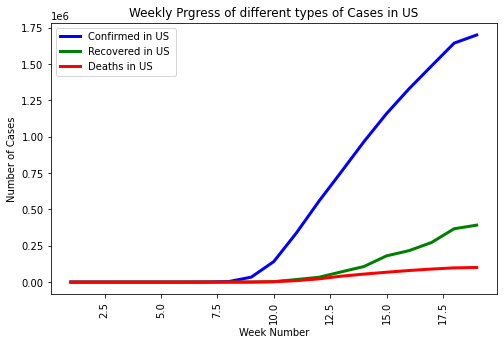

In [ ]:
grouped_multiple_US["WeekofYear"]=grouped_multiple_US.index.weekofyear
week_num_US=[]
US_week_Confirmed=[]
US_week_Recovered=[]
US_week_Deaths=[]
w=1
for i in list(grouped_multiple_US["WeekofYear"].unique()):
  US_week_Confirmed.append(grouped_multiple_US[grouped_multiple_US["WeekofYear"]==i]["Confirmed"].iloc[-1])
  US_week_Recovered.append(grouped_multiple_US[grouped_multiple_US["WeekofYear"]==i]["Recovered"].iloc[-1])
  US_week_Deaths.append(grouped_multiple_US[grouped_multiple_US["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num_US.append(w)
  w=w+1

plt.figure(figsize=(8,5))
#plt.plot(week_num_US,US_week_Confirmed,marker="o",color='blue',linewidth=3)
plt.plot(week_num_US,US_week_Confirmed,label='Confirmed in US ', color='blue',linewidth=3)
plt.plot(week_num_US,US_week_Recovered,label='Recovered in US', color='green',linewidth=3)
plt.plot(week_num_US,US_week_Deaths,label='Deaths in US',color='red',linewidth=3,)
plt.xlabel("Week Number")
plt.ylabel("Number of Cases")
plt.title("Weekly Prgress of different types of Cases in US")
plt.legend()
plt.xticks(rotation=90)


In [ ]:
# Data Analysis for Italy 
Italy_data=Covid19[Covid19["Country/Region"]=="Italy"]
grouped_multiple_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print (grouped_multiple_Italy.iloc[-1])
print("Total Active Cases",grouped_multiple_Italy["Confirmed"].iloc[-1]-grouped_multiple_Italy["Recovered"].iloc[-1]-grouped_multiple_Italy["Deaths"].iloc[-1])
print("Total Closed Cases",grouped_multiple_Italy["Recovered"].iloc[-1]+grouped_multiple_Italy["Deaths"].iloc[-1])



Confirmed    231139.0
Recovered    147101.0
Deaths        33072.0
Name: 2020-05-27 00:00:00, dtype: float64
Total Active Cases 50966.0
Total Closed Cases 180173.0


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text major ticklabel objects>)

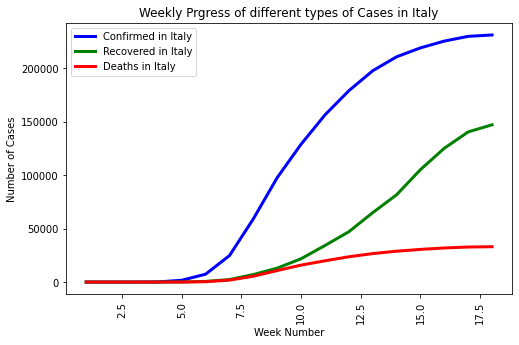

In [ ]:
grouped_multiple_Italy["WeekofYear"]=grouped_multiple_Italy.index.weekofyear
week_num_Italy=[]
Italy_week_Confirmed=[]
Italy_week_Recovered=[]
Italy_week_Deaths=[]
w=1
for i in list(grouped_multiple_Italy["WeekofYear"].unique()):
  Italy_week_Confirmed.append(grouped_multiple_Italy[grouped_multiple_Italy["WeekofYear"]==i]["Confirmed"].iloc[-1])
  Italy_week_Recovered.append(grouped_multiple_Italy[grouped_multiple_Italy["WeekofYear"]==i]["Recovered"].iloc[-1])
  Italy_week_Deaths.append(grouped_multiple_Italy[grouped_multiple_Italy["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num_Italy.append(w)
  w=w+1

plt.figure(figsize=(8,5))
#plt.plot(week_num_Italy,Italy_week_Confirmed,marker="o",color='blue',linewidth=3)
plt.plot(week_num_Italy,Italy_week_Confirmed,label='Confirmed in Italy',color='blue',linewidth=3)
plt.plot(week_num_Italy,Italy_week_Recovered,label='Recovered in Italy',color='green',linewidth=3)
plt.plot(week_num_Italy,Italy_week_Deaths,label='Deaths in Italy',color='red',linewidth=3,)
plt.xlabel("Week Number")
plt.ylabel("Number of Cases")
plt.title("Weekly Prgress of different types of Cases in Italy")
plt.legend()
plt.xticks(rotation=90)


In [ ]:
# Data Analysis for Spain 
Spain_data=Covid19[Covid19["Country/Region"]=="Spain"]
grouped_multiple_Spain=Spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print (grouped_multiple_Spain.iloc[-1])
print("Total Active Cases",grouped_multiple_Spain["Confirmed"].iloc[-1]-grouped_multiple_Spain["Recovered"].iloc[-1]-grouped_multiple_Spain["Deaths"].iloc[-1])
print("Total Closed Cases",grouped_multiple_Spain["Recovered"].iloc[-1]+grouped_multiple_Spain["Deaths"].iloc[-1])



Confirmed    236259.0
Recovered    150376.0
Deaths        27117.0
Name: 2020-05-27 00:00:00, dtype: float64
Total Active Cases 58766.0
Total Closed Cases 177493.0


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text major ticklabel objects>)

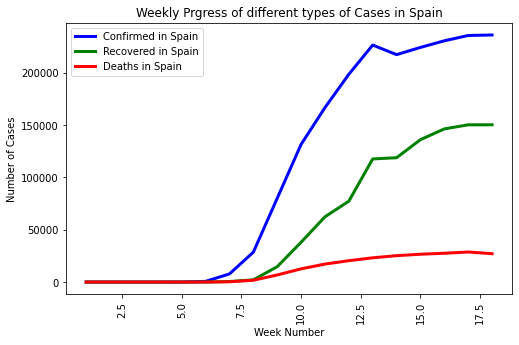

In [ ]:
grouped_multiple_Spain["WeekofYear"]=grouped_multiple_Spain.index.weekofyear
week_num_Spain=[]
Spain_week_Confirmed=[]
Spain_week_Recovered=[]
Spain_week_Deaths=[]
w=1
for i in list(grouped_multiple_Spain["WeekofYear"].unique()):
  Spain_week_Confirmed.append(grouped_multiple_Spain[grouped_multiple_Spain["WeekofYear"]==i]["Confirmed"].iloc[-1])
  Spain_week_Recovered.append(grouped_multiple_Spain[grouped_multiple_Spain["WeekofYear"]==i]["Recovered"].iloc[-1])
  Spain_week_Deaths.append(grouped_multiple_Spain[grouped_multiple_Spain["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num_Spain.append(w)
  w=w+1

plt.figure(figsize=(8,5))
#plt.plot(week_num_Spain,Spain_week_Confirmed,marker="o",color='blue',linewidth=3)
plt.plot(week_num_Spain,Spain_week_Confirmed,label='Confirmed in Spain',color='blue',linewidth=3)
plt.plot(week_num_Spain,Spain_week_Recovered,label='Recovered in Spain',color='green',linewidth=3)
plt.plot(week_num_Spain,Spain_week_Deaths,label='Deaths in Spain',color='red',linewidth=3,)
plt.xlabel("Week Number")
plt.ylabel("Number of Cases")
plt.title("Weekly Prgress of different types of Cases in Spain")
plt.legend()
plt.xticks(rotation=90)


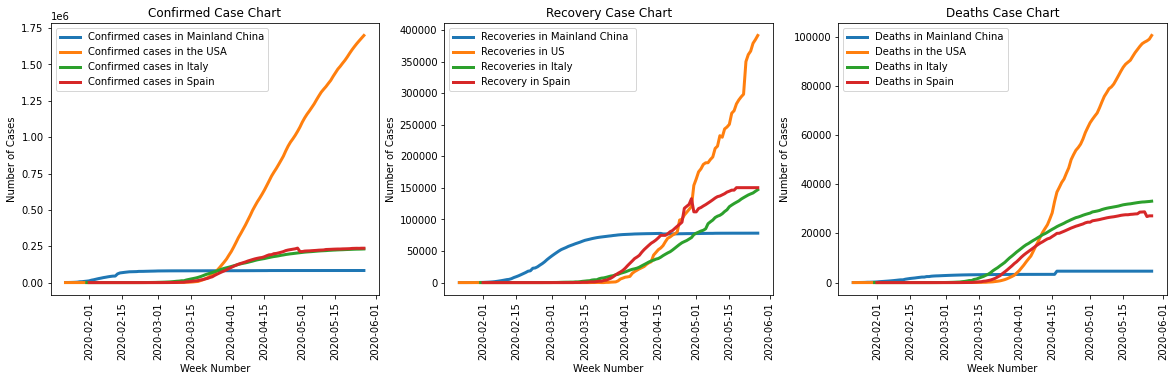

In [ ]:
# Comparison of China, Italy, US, and Spain 
China_data=Covid19[Covid19["Country/Region"]=="Mainland China"]
US_data=Covid19[Covid19["Country/Region"]=="US"]
Italy_data=Covid19[Covid19["Country/Region"]=="Italy"]
Spain_data=Covid19[Covid19["Country/Region"]=="Spain"]
rest_of_world=Covid19[(Covid19["Country/Region"]!="Mainland China")&(Covid19["Country/Region"]!="Italy")&(Covid19["Country/Region"]!="US")&(Covid19["Country/Region"]!="Spain")]

grouped_multiple_China=China_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_multiple_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_multiple_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_multiple_Spain=Spain_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))
ax1.plot(grouped_multiple_China["Confirmed"],label="Confirmed cases in Mainland China",linewidth=3)
ax1.plot(grouped_multiple_US["Confirmed"],label="Confirmed cases in the USA",linewidth=3)
ax1.plot(grouped_multiple_Italy["Confirmed"],label="Confirmed cases in Italy",linewidth=3)
ax1.plot(grouped_multiple_Spain["Confirmed"],label="Confirmed cases in Spain",linewidth=3)
ax1.set_title("Confirmed Case Chart")
ax1.set_ylabel("Number of Cases")
ax1.set_xlabel("Week Number")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

ax2.plot(grouped_multiple_China["Recovered"],label="Recoveries in Mainland China ",linewidth=3)
ax2.plot(grouped_multiple_US["Recovered"],label="Recoveries in US ",linewidth=3)
ax2.plot(grouped_multiple_Italy["Recovered"],label="Recoveries in Italy",linewidth=3)
ax2.plot(grouped_multiple_Spain["Recovered"],label="Recovery in Spain",linewidth=3)
ax2.set_title("Recovery Case Chart")
ax2.set_ylabel("Number of Cases")
ax2.set_xlabel("Week Number")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

ax3.plot(grouped_multiple_China["Deaths"],label='Deaths in Mainland China',linewidth=3)
ax3.plot(grouped_multiple_US["Deaths"],label='Deaths in the USA',linewidth=3)
ax3.plot(grouped_multiple_Italy["Deaths"],label='Deaths in Italy',linewidth=3)
ax3.plot(grouped_multiple_Spain["Deaths"],label='Deaths in Spain',linewidth=3)
ax3.set_title("Deaths Case Chart")
ax3.set_ylabel("Number of Cases")
ax3.set_xlabel("Week Number")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
    
plt.savefig('04br.png')

In [ ]:
# Linear Regression  (95)
grouped_multiple["Days Since"]=grouped_multiple.index-grouped_multiple.index[0]
grouped_multiple["Days Since"]=grouped_multiple["Days Since"].dt.days
train_ml=grouped_multiple.iloc[:int(grouped_multiple.shape[0]*0.95)] 
valid_ml=grouped_multiple.iloc[:int(grouped_multiple.shape[0]*0.95):]
model_scores=[]

In [ ]:
#Linear Regression Model
lin_reg=LinearRegression(normalize=True)

In [ ]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
Prediction_valid_lin_reg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_lin_reg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_lin_reg)))

#model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_lin_reg)))
#print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_lin_reg)))

#model_scores.append((mean_squared_error(valid_ml["Confirmed"],Prediction_valid_lin_reg)))
#print("Mean Squared Error for Linear Regression: ",(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_lin_reg)))

model_scores.append((mean_absolute_error(valid_ml["Confirmed"],Prediction_valid_lin_reg)))
print("Mean Absolute Error for Linear Regression: ",(mean_absolute_error(valid_ml["Confirmed"],Prediction_valid_lin_reg)))

model_scores.append((r2_score(valid_ml["Confirmed"],Prediction_valid_lin_reg)))
print("r2_score for Linear Regression: ",(r2_score(valid_ml["Confirmed"],Prediction_valid_lin_reg)))

Root Mean Square Error for Linear Regression:  664497.2973033818
Mean Absolute Error for Linear Regression:  577728.4130439807
r2_score for Linear Regression:  0.8215018678423002


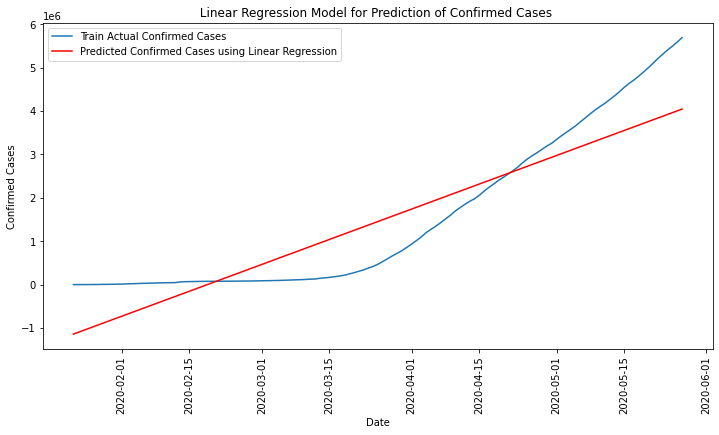

In [ ]:
plt.figure(figsize=(12,6))
prediction_linreg=lin_reg.predict(np.array(grouped_multiple["Days Since"]).reshape(-1,1))
plt.plot(grouped_multiple["Confirmed"],label="Train Actual Confirmed Cases")
plt.plot(grouped_multiple.index,prediction_linreg,label="Predicted Confirmed Cases using Linear Regression",color='red')
#plt.plot(grouped_multiple.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='green')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title(" Linear Regression Model for Prediction of Confirmed Cases  ")
plt.xticks(rotation=90)
plt.legend()
plt.savefig('05br.png')


In [ ]:
new_date=[]
new_prediction_lr=[]
for i in range(1,18):
  new_date.append(grouped_multiple.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(grouped_multiple["Days Since"].max()+i).reshape(-1,1))[0][0])
pd.set_option("display.float_format",lambda x: '%.f' % x)   
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr),columns = ["Dates","Linear Regression Prediction"])
model_predictions.head(5)

,Dates,Linear Regression Prediction
0,2020-05-28,4086273
1,2020-05-29,4127427
2,2020-05-30,4168580
3,2020-05-31,4209733
4,2020-06-01,4250887


In [ ]:
#LogisticRegression
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics 
#grouped_multiple["Days Since"]=grouped_multiple.index-grouped_multiple.index[0]
#grouped_multiple["Days Since"]=grouped_multiple["Days Since"].dt.days
#train_ml=grouped_multiple.iloc[:int(grouped_multiple.shape[0]*0.95)]
#valid_ml=grouped_multiple.iloc[:int(grouped_multiple.shape[0]*0.95)]
#model_scores=[]


In [ ]:
#Logistic Regression Model()

#log_reg=LogisticRegression()
#log_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))


In [ ]:
#Prediction_valid_log_reg=log_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))


In [ ]:
#model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_log_reg)))
#print("Root Mean Square Error for Logistic Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_log_reg)))


#model_scores.append((r2_score(valid_ml["Confirmed"],Prediction_valid_log_reg)))
#print("r2_score for Linear Regression: ",(r2_score(valid_ml["Confirmed"],Prediction_valid_log_reg)))


Root Mean Square Error for Logistic Regression:  1426653.628137967
r2_score for Linear Regression:  0.17721885923095193


In [ ]:
#plt.figure(figsize=(12,6))
#prediction_logreg=log_reg.predict(np.array(grouped_multiple["Days Since"]).reshape(-1,1))
#plt.plot(grouped_multiple["Confirmed"],label="Train Actual Confirmed Cases")
#plt.plot(grouped_multiple.index,prediction_logreg,label="Predicted Confirmed Cases using Logistic Regression",color='red')
#plt.xlabel('Date')
#plt.ylabel('Confirmed Cases')
#plt.title(" Logistic Regression Model for Prediction of Confirmed Cases  ")
#plt.xticks(rotation=90)
#plt.legend()

In [ ]:
#new_date=[]
#new_prediction_lg=[]
#for i in range(1,18):
 # new_date.append(grouped_multiple.index[-1]+timedelta(days=i))
  #new_prediction_lg.append(log_reg.predict(np.array(grouped_multiple["Days Since"].max()+i).reshape(-1,1))[0])

#pd.set_option("display.float_format",lambda x: '%.f' % x)   
#model_predictions=pd.DataFrame(zip(new_date,new_prediction_lg),columns = ["Dates","Logistic Regression Prediction"])
#model_predictions.head()    


In [ ]:
# Polynomial Regression
train_ml=grouped_multiple.iloc[:int(grouped_multiple.shape[0]*0.95)]
valid_ml=grouped_multiple.iloc[int(grouped_multiple.shape[0]*0.95):]


In [ ]:
poly = PolynomialFeatures(degree = 2)        #6


In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]


In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)
#mse_poly=(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
#model_scores.append(mse_poly)
#print("Mean Squared Error for Polynomial Regression: ",mse_poly)

model_scores.append((mean_absolute_error(valid_ml["Confirmed"],prediction_poly)))
print("Mean Absolute Error for Polynomial Regression: ",(mean_absolute_error(valid_ml["Confirmed"],prediction_poly)))


model_scores.append((r2_score(valid_ml["Confirmed"],prediction_poly)))
print(" R Squared for Polynomial Regression: ",(r2_score(valid_ml["Confirmed"],prediction_poly)))


Root Mean Squared Error for Polynomial Regression:  239132.31086957394
Mean Absolute Error for Polynomial Regression:  235272.68368836612
 R Squared for Polynomial Regression:  -0.5245525539108327


<Figure size 864x432 with 0 Axes>

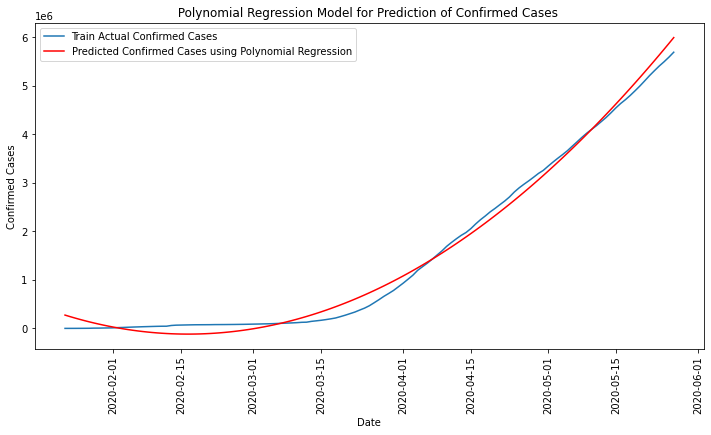

In [ ]:
#comp_data=poly.fit_transform(np.array(grouped_multiple["Days Since"]).reshape(-1,1))
poly_reg=poly.fit_transform(np.array(grouped_multiple["Days Since"]).reshape(-1,1))
plt.figure(figsize=(12,6))
predictions_poly=linreg.predict(poly_reg)
plt.figure(figsize=(12,6))
prediction_linreg=lin_reg.predict(np.array(grouped_multiple["Days Since"]).reshape(-1,1))
plt.plot(grouped_multiple["Confirmed"],label="Train Actual Confirmed Cases")
plt.plot(grouped_multiple.index,predictions_poly,label="Predicted Confirmed Cases using Polynomial Regression",color='red')
#plt.plot(grouped_multiple.index,predictions_poly, linestyle='--',label="Predicted Confirmed Cases using Polynomial Regression",color='green')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title(" Polynomial Regression Model for Prediction of Confirmed Cases  ")
plt.xticks(rotation=90)
plt.legend()


In [ ]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(grouped_multiple["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)   
model_predictions=pd.DataFrame(zip(new_date,new_prediction_poly),columns = ["Dates","Polynomial Regression Prediction"])
model_predictions.head()


,Dates,Polynomial Regression Prediction
0,2020-05-28,6115352
1,2020-05-29,6238725
2,2020-05-30,6363306
3,2020-05-31,6489097
4,2020-06-01,6616097


In [ ]:
# Support Vector Machine Model for Prediction of Confirmed Cases
#Intializing SVR Model and with hyperparameters for GridSearchCV
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)


In [ ]:
#Performing GridSearchCV to find the Best Estimator
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
Prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))


In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_svm)))
#rmse_svm_Linear=np.sqrt(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_svm))

precision = 2
#print( "{:.{}f}".format( pi, precision )) 

print( "Root Mean Square Error for Support Vectore Machine: {:.{}f}".format( np.sqrt(mean_squared_error(valid_ml["Confirmed"],Prediction_valid_svm)), precision ))

model_scores.append((mean_absolute_error(valid_ml["Confirmed"],Prediction_valid_svm)))
precision = 2
print( " Mean Absolute Error for Support Vectore Machine: {:.{}f}".format((mean_absolute_error(valid_ml["Confirmed"],Prediction_valid_svm)), precision ))

#model_scores.append(np.sqrt(mean_absolute_error(valid_ml["Confirmed"],Prediction_valid_svm)))
#precision = 2
#print( "Root Mean Absolute Error for Support Vectore Machine: {:.{}f}".format( np.sqrt(mean_absolute_error(valid_ml["Confirmed"],Prediction_valid_svm)), precision ))

#model_scores.append((r2_score(valid_ml["Confirmed"],Prediction_valid_svm)))
#print( " R Square  for Support Vectore Machine: {:.{}f}".format((r2_score(valid_ml["Confirmed"],Prediction_valid_svm)), precision ))
#print((r2_score(valid_ml["Confirmed"],Prediction_valid_svm)), precision )


Root Mean Square Error for Support Vectore Machine: 267714.05
 Mean Absolute Error for Support Vectore Machine: 220627.24


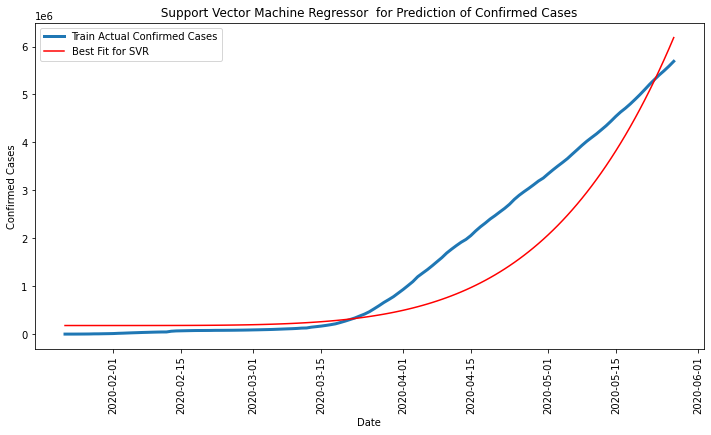

In [ ]:
plt.figure(figsize=(12,6))
prediction_svm=svm.predict(np.array(grouped_multiple["Days Since"]).reshape(-1,1))
plt.plot(grouped_multiple["Confirmed"],label="Train Actual Confirmed Cases",linewidth=3)
plt.plot(grouped_multiple.index,prediction_svm,label="Best Fit for SVR",color='red')
#plt.plot(grouped_multiple.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='green')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title(" Support Vector Machine Regressor  for Prediction of Confirmed Cases ")
plt.xticks(rotation=90)
plt.legend()


In [ ]:
new_date=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(grouped_multiple.index[-1]+timedelta(days=i))
  new_prediction_svm.append(svm.predict(np.array(grouped_multiple["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)   
model_predictions=pd.DataFrame(zip(new_date,new_prediction_svm),columns = ["Dates","Support Vector Machine Prediction"])
model_predictions.head()                   

,Dates,Support Vector Machine Prediction
0,2020-05-28,6429164
1,2020-05-29,6679112
2,2020-05-30,6936994
3,2020-05-31,7202998
4,2020-06-01,7477314


In [ ]:
# Linear Regression,Polynomial Regression VS Support Vector Regression

new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(grouped_multiple.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(grouped_multiple["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_poly.append(lin_reg.predict(np.array(grouped_multiple["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(grouped_multiple["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)   
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),columns = ["Dates","Linear Regression","Polynomial Regression","Support Vector Regression"])
model_predictions.head()  

,Dates,Linear Regression,Polynomial Regression,Support Vector Regression
0,2020-05-28,4086273,6115352,6429164
1,2020-05-29,4127427,6238725,6679112
2,2020-05-30,4168580,6363306,6936994
3,2020-05-31,4209733,6489097,7202998
4,2020-06-01,4250887,6616097,7477314


In [ ]:
# Time Series Forecasting
# Holt Model

train_ml=grouped_multiple.iloc[:int(grouped_multiple.shape[0]*0.95)]
valid_ml=grouped_multiple.iloc[int(grouped_multiple.shape[0]*0.95):]
y_pred=valid_ml.copy()

In [ ]:
#holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.2, smoothing_slope=0.8,optimized=False)
holt=Holt(np.asarray(train_ml["Confirmed"])).fit(smoothing_level=1.2, smoothing_slope=0.9,optimized=False)

In [ ]:
y_pred["Holt"]=holt.forecast(len(valid_ml))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
#y_pred["Holt"]=holt.forecast(len(valid))
#rmse_holt_linear=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))
#model_scores.append(rmse_holt_linear)
#print("Root Mean Square Error Holt's Linear Model: ",rmse_holt_linear)

model_scores.append((mean_absolute_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",(mean_absolute_error(y_pred["Confirmed"],y_pred["Holt"])))

#model_scores.append(np.sqrt(mean_absolute_error(y_pred["Confirmed"],y_pred["Holt"])))
#print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_absolute_error(y_pred["Confirmed"],y_pred["Holt"])))

y_pred["Holt"]=holt.forecast(len(valid_ml))
model_scores.append((r2_score(y_pred["Confirmed"],y_pred["Holt"])))
print("R  Square Error Holt's Linear Model: ",(r2_score(y_pred["Confirmed"],y_pred["Holt"])))


Root Mean Square Error Holt's Linear Model:  10465.706313270393
Root Mean Square Error Holt's Linear Model:  8379.376607596076
R  Square Error Holt's Linear Model:  0.9970798647598086


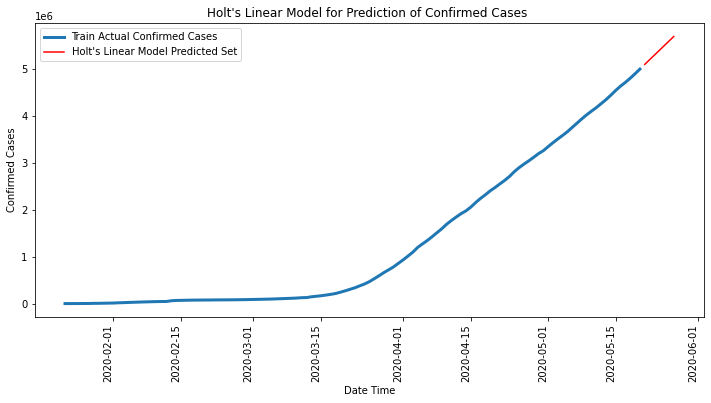

In [ ]:
#fig=go.Figure()
#fig.add_trace(go.Scatter(x=train_ml.index, y=train_ml["Confirmed"],
              #     mode='lines+markers',name="Train Data for Confirmed Cases"))
#fig.add_trace(go.Scatter(x=valid_ml.index, y=y_pred["Holt"],
#mode='lines+markers',name="Predicted Confirmed Cases using Holt Regression",))
#fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
   #              xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
#fig.show()

plt.figure(figsize=(12,6))
plt.plot(train_ml["Confirmed"],label="Train Actual Confirmed Cases",linewidth=3)
#plt.plot(train_ml.Confirmed,label="Train Set",marker='o')
#valid_ml.Confirmed.plot(label="Validation Set",marker='*')
y_pred.Holt.plot(label="Holt's Linear Model Predicted Set",color='red')
#y_pred.Holt.plot(label="Holt's Linear Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Holt's Linear Model for Prediction of Confirmed Cases ")
plt.xticks(rotation=90)
plt.legend()



In [ ]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
  holt_new_date.append(grouped_multiple.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast((len(valid_ml)+i))[-1])

model_predictions["Holt Linear Model Prediction"]=holt_new_prediction
model_predictions.head(7)


,Dates,Linear Regression,Polynomial Regression,Support Vector Regression,Holt Linear Model Prediction
0,2020-05-28,4086273,6115352,6429164,5788727
1,2020-05-29,4127427,6238725,6679112,5887637
2,2020-05-30,4168580,6363306,6936994,5986547
3,2020-05-31,4209733,6489097,7202998,6085458
4,2020-06-01,4250887,6616097,7477314,6184368
5,2020-06-02,4292040,6744305,7760135,6283278
6,2020-06-03,4333194,6873723,8051657,6382189
